In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the Data
train = pd.read_csv("train.csv", index_col="id")
test = pd.read_csv("test.csv", index_col="id")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39098 entries, 58645 to 97742
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.6+ MB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [6]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,39098.0,27.566781,6.032761,20.00,23.00,26.00,30.00,94.00
person_income,39098.0,64060.460842,37955.828705,4000.00,42000.00,58000.00,75885.00,1900000.00
person_emp_length,39098.0,4.687068,3.868395,0.00,2.00,4.00,7.00,42.00
loan_amnt,39098.0,9251.466188,5576.254680,700.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,39098.0,10.661216,3.020220,5.42,7.88,10.75,12.99,22.11
loan_percent_income,39098.0,0.159573,0.091633,0.00,0.09,0.14,0.21,0.73
cb_person_cred_hist_length,39098.0,5.830707,4.072157,2.00,3.00,4.00,8.00,30.00


In [7]:
categorical_features = train.select_dtypes(include=["object"]).columns.tolist()
unique_values = {col: train[col].unique() for col in categorical_features}
for col, value in unique_values.items():
    print(f"{col}: {value} unique values")

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] unique values
loan_intent: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT'] unique values
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G'] unique values
cb_person_default_on_file: ['N' 'Y'] unique values


In [10]:
target = "loan_status"

/Users/mac/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

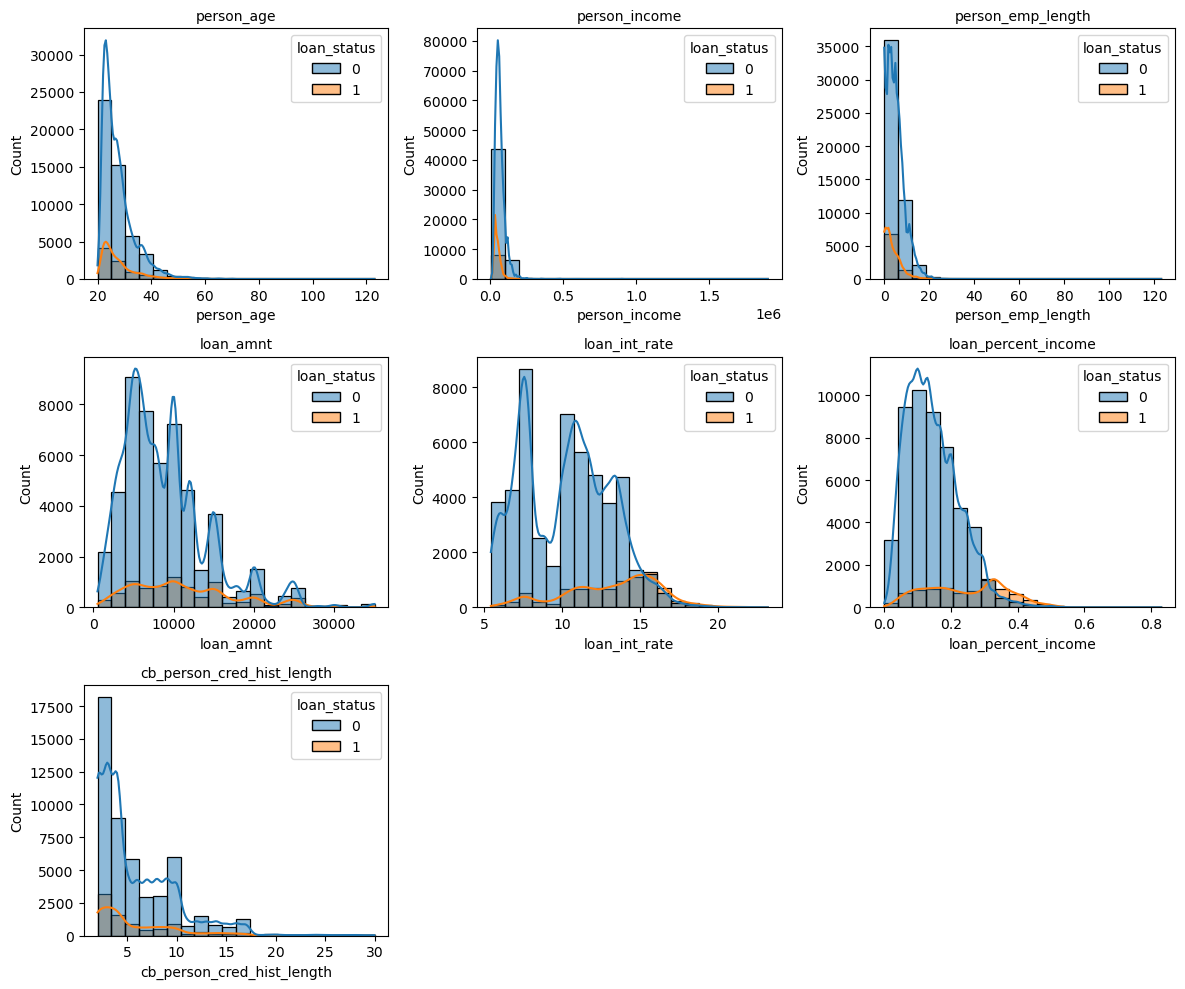

In [12]:
numerical_features = train.select_dtypes(exclude=["object"]).columns.tolist()
fig, axs = plt.subplots(3, 3, figsize=(12,10))

for feat, ax in zip(numerical_features, axs.ravel()):
    sns.histplot(x=feat, hue=target, data=train, kde=True, bins=20, ax=ax)
    ax.set_title(f"{feat}", fontsize=10)
    
# Remove the last two unused subplots
for i in range(7, 9):
    fig.delaxes(axs.ravel()[i])

plt.tight_layout()
plt.show()


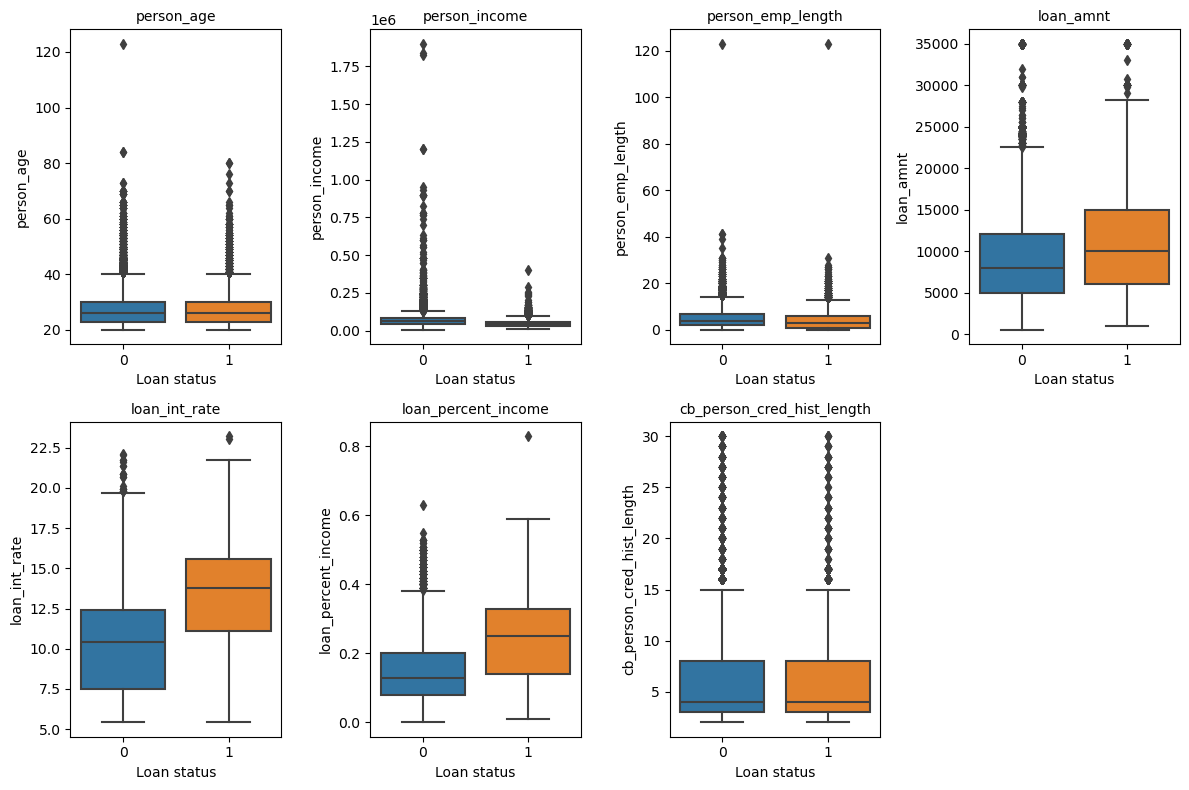

In [16]:
fig, axs = plt.subplots(2, 4, figsize=(12,8))

for feat, ax in zip(numerical_features, axs.ravel()):
    sns.boxplot(y=feat, x=target, data =train, ax =ax)
    ax.set_title(f"{feat}",fontsize=10)
    ax.set_xlabel("Loan status")

fig.delaxes(axs.ravel()[7])
plt.tight_layout()
plt.show()

In [17]:
def detect_outliers(df, column):
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    return df[(df[column] < lower_limit) | (df[column] > upper_limit)]

for feat in numerical_features:
    outliers = detect_outliers(train, feat)
    print(f"Outliers in column {feat}: {outliers.shape[0]}")

Outliers in column person_age: 2446
Outliers in column person_income: 2411
Outliers in column person_emp_length: 1274
Outliers in column loan_amnt: 2045
Outliers in column loan_int_rate: 34
Outliers in column loan_percent_income: 1210
Outliers in column cb_person_cred_hist_length: 1993
Outliers in column loan_status: 8350


/Users/mac/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/miniconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

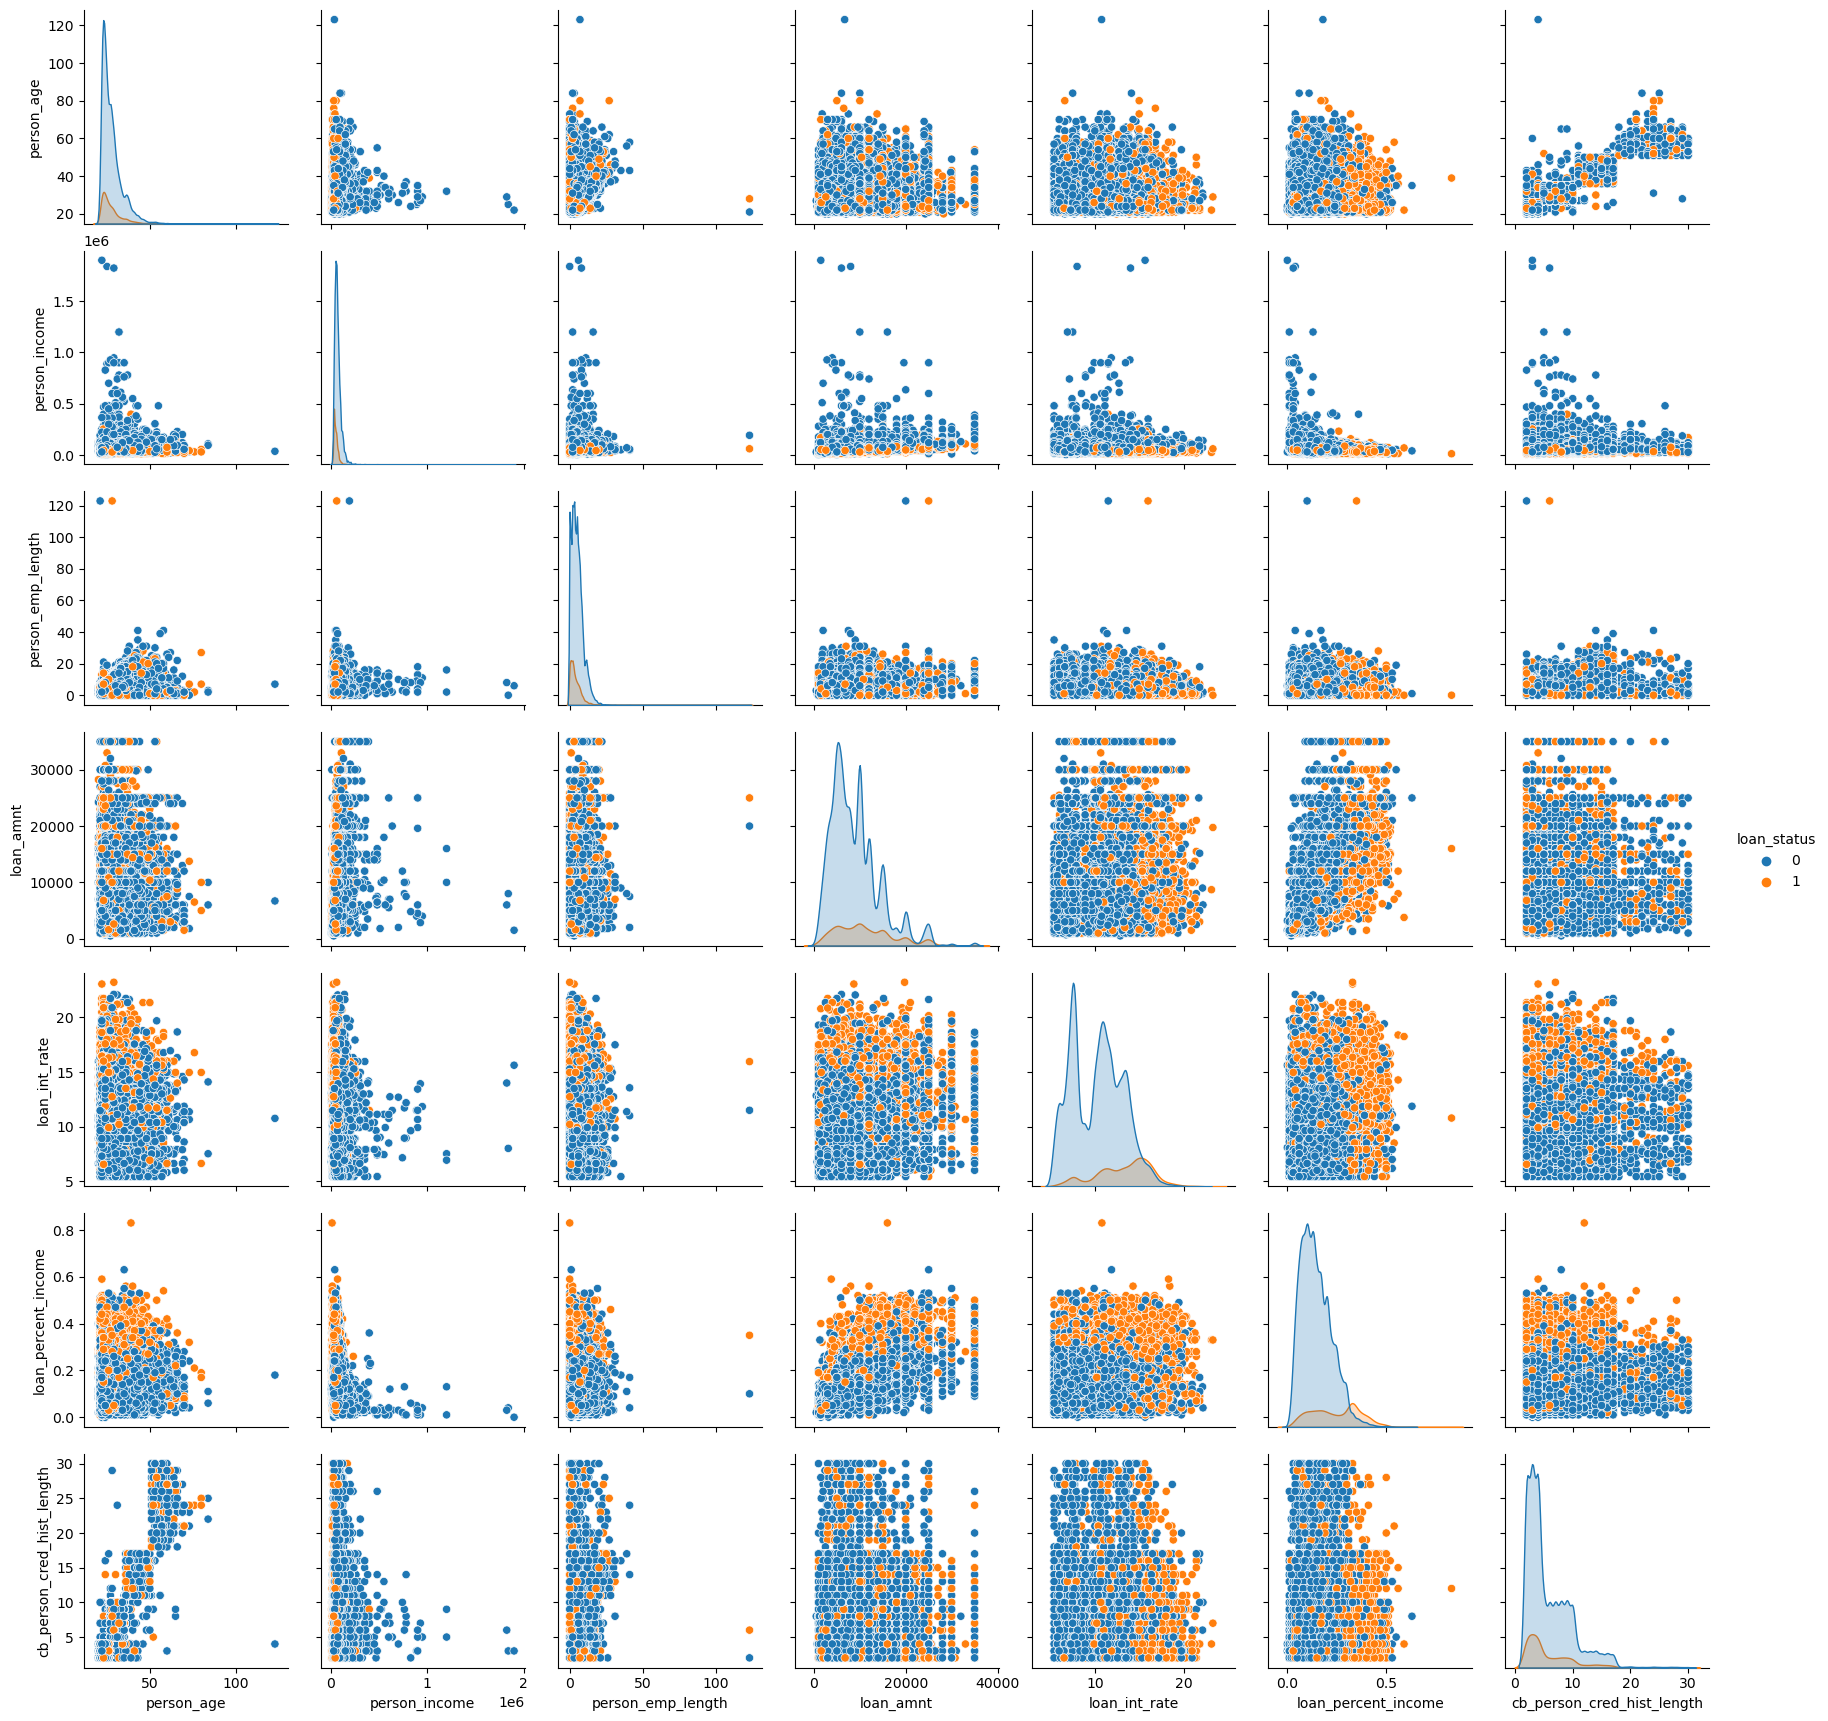

In [22]:
columns_to_plot = train.select_dtypes(exclude=["object"]).columns.tolist()
sns.pairplot(train[columns_to_plot], hue=target)
plt.show()

In [25]:
categorical_features = train.select_dtypes(include = ["object"]).columns.tolist()
categorical_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']